# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [115]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [116]:
# Checking the number of mice.
number_mice = mouse_metadata['Mouse ID'].count()
number_mice

249

In [117]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mice_id = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mice_id

array(['g989'], dtype=object)

In [118]:
# Optional: Get all the data for the duplicate mouse ID.


In [119]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df = combined_df[combined_df["Mouse ID"]!="g989"]
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [120]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean = len(combined_df["Mouse ID"].unique())
number_mice_clean

248

## Summary Statistics

In [121]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics_final = summary_statistics.rename(columns = {'mean': 'Mean Tumor Volume', 
                              'median':'Median Tumor Volume', 
                              'var':'Tumor Volume Variance', 
                              'std':'Tumor Volume Std. Dev.',
                              'sem':'Tumor Volume Std. Err.'})

summary_statistics_final

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

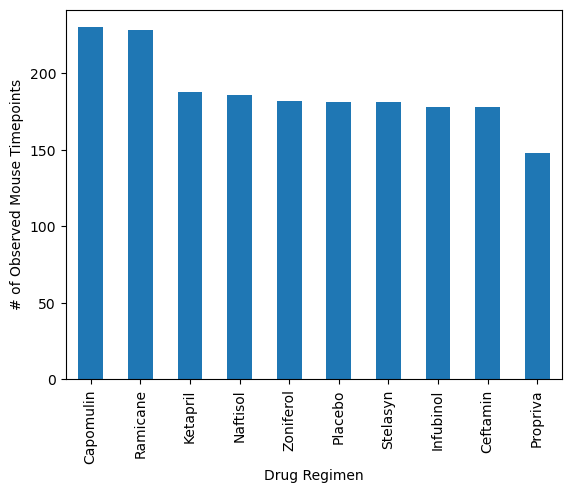

In [122]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_reg = combined_df["Drug Regimen"].value_counts()
drug_reg.plot(kind='bar')
plt.ylabel('# of Observed Mouse Timepoints')

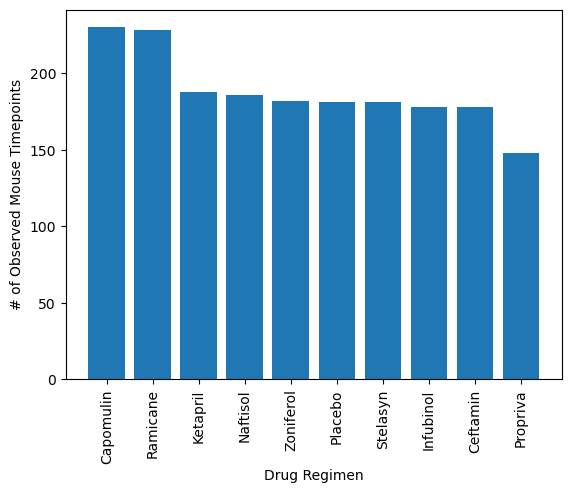

In [123]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drug_reg.index
y_axis = drug_reg.values
plt.bar(x_axis, y_axis)

plt.xticks(rotation=90,ha='center')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

Text(0, 0.5, 'Sex')

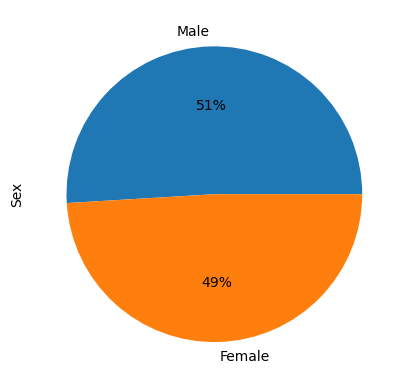

In [124]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
sex = combined_df['Sex'].value_counts()
sex.plot(kind = 'pie', autopct='%1.0f%%')
plt.ylabel ('Sex')

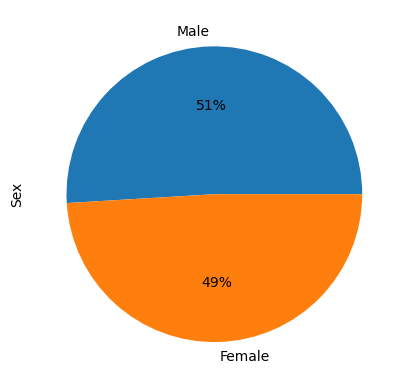

In [125]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x_axis = sex.index
y_axis = sex.values
plt.pie(sex, labels = sex.index, autopct='%1.0f%%')

plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [126]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = combined_df.groupby('Mouse ID')
last_timepoint = last_timepoint['Timepoint'].max()
last_timepoint_df = pd.DataFrame(last_timepoint)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol = pd.merge(last_timepoint_df, combined_df, on = ['Mouse ID', 'Timepoint'])

In [127]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vols = combined_df.loc[combined_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_vols)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vols.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)

    # Identify potential outliers
    outliers = tumor_vols[(tumor_vols < lower_bound) | (tumor_vols > upper_bound)]
outliers
    

Series([], Name: Tumor Volume (mm3), dtype: float64)

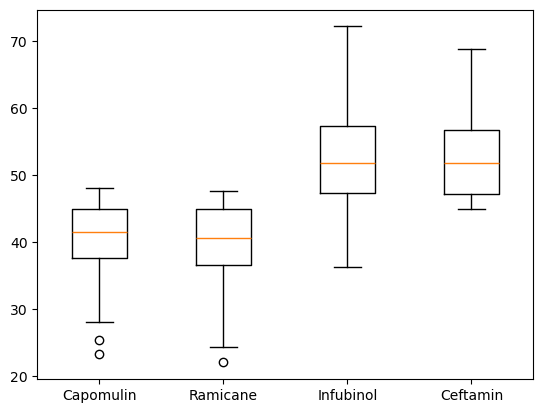

In [128]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

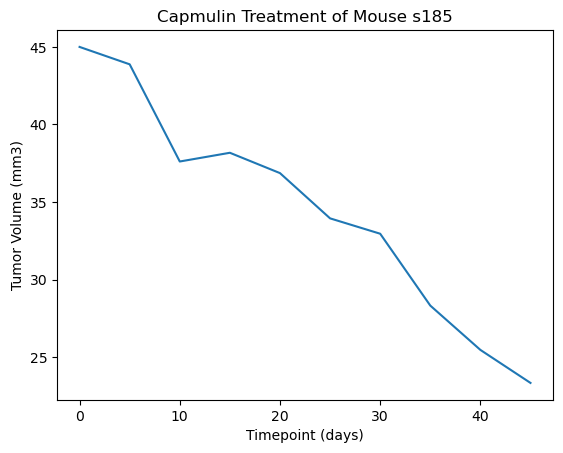

In [129]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = combined_df[combined_df['Drug Regimen'] == 'Capomulin']
mouse_id = 's185'
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.title('Capmulin Treatment of Mouse s185')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

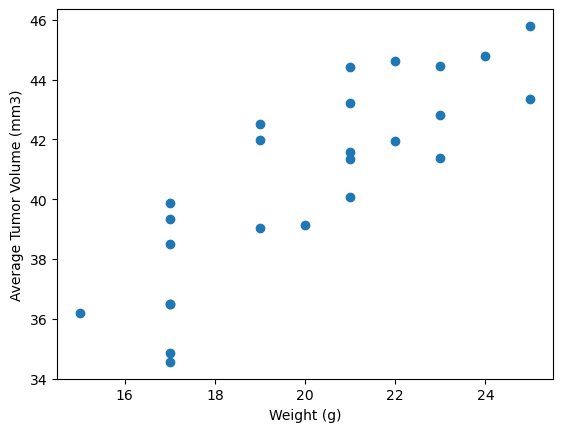

In [130]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_volume = combined_df[combined_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_weight = combined_df[combined_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Weight (g)'].mean()
merged_df = pd.merge(avg_tumor_volume, avg_weight, on='Mouse ID', suffixes=('_avg_tumor_volume', '_avg_weight'))
plt.scatter(merged_df['Weight (g)'], merged_df['Tumor Volume (mm3)'])

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8419363424694721


Text(0, 0.5, 'Average Tumor Volume (mm3)')

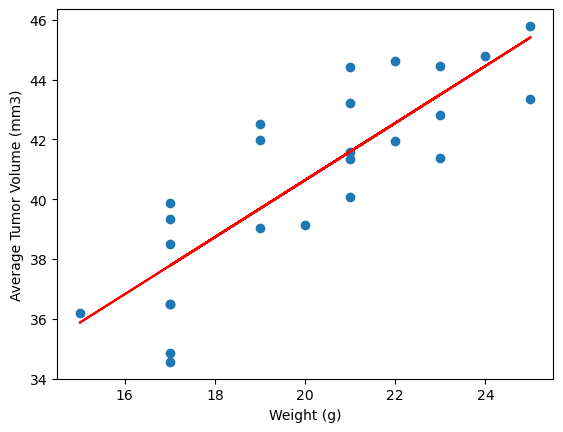

In [131]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlatoion_coefficient, _ = st.pearsonr(merged_df['Weight (g)'], merged_df['Tumor Volume (mm3)'])
print("The correlation between mouse weight and the average tumor volume is", corr_coeff)
plt.scatter(merged_df['Weight (g)'], merged_df['Tumor Volume (mm3)'])
slope, intercept = np.polyfit(merged_df['Weight (g)'], merged_df['Tumor Volume (mm3)'], 1)
x_values = merged_df['Weight (g)']
regression_line = slope * x_values + intercept
plt.plot(x_values, regression_line, color='r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')